In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [27]:
np.random.seed(101) 
tf.set_random_seed(101) 

In [37]:
df = pd.read_csv("DialysisCareQualityData.csv")
df.dropna(inplace=True)

df.shape

(6077, 59)

In [38]:
x = df["TotalStaff"] / df["TotalPatients"]
y = df["SRR"]
n = len(x) # Number of data points 
n

6077

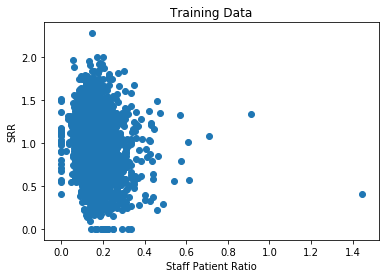

In [39]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('Staff Patient Ratio') 
plt.ylabel('SRR') 
plt.title("Training Data") 
plt.show() 


In [40]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [41]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [46]:
learning_rate = 0.10
training_epochs = 20

In [47]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [48]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
  # Displaying the result after every 50 epochs 
        if (epoch + 1) % 2 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 2 : cost = 0.08253914 W = 0.91634107 b = 0.56600773
Epoch 4 : cost = 0.0694129 W = 0.9229858 b = 0.61671066
Epoch 6 : cost = 0.060690105 W = 0.9282251 b = 0.6580659
Epoch 8 : cost = 0.05489307 W = 0.93231577 b = 0.6918016
Epoch 10 : cost = 0.051040456 W = 0.93547386 b = 0.71932185
Epoch 12 : cost = 0.048479404 W = 0.93786633 b = 0.7417773
Epoch 14 : cost = 0.046776064 W = 0.93964064 b = 0.7601076
Epoch 16 : cost = 0.045642808 W = 0.9409115 b = 0.7750723
Epoch 18 : cost = 0.044888217 W = 0.9417659 b = 0.78729564
Epoch 20 : cost = 0.044385117 W = 0.94228625 b = 0.79728585


In [49]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 0.044385117 Weight = 0.94228625 bias = 0.79728585 



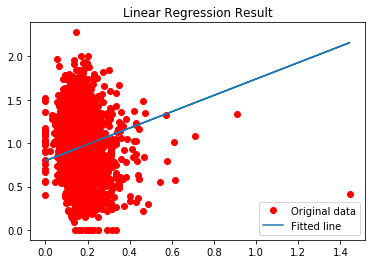

In [50]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 